In [1]:
!pip install yfinance


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
msft = yf.Ticker('MSFT') 
info_1y = msft.history(period = "1y")
info_1y['Date'] = info_1y.index
info_1y = info_1y.reset_index (drop = True)

In [4]:
info_1y.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,265.909676,270.723133,264.998470,270.624084,26910800,0.0,0.0,2022-05-27 00:00:00-04:00
1,269.920897,272.139442,266.355356,269.267212,37827700,0.0,0.0,2022-05-31 00:00:00-04:00
2,272.565335,275.031486,267.454731,269.811951,25292200,0.0,0.0,2022-06-01 00:00:00-04:00
3,261.918270,272.020601,259.095548,271.951263,44008200,0.0,0.0,2022-06-02 00:00:00-04:00
4,267.722138,270.832091,265.840334,267.434906,28059000,0.0,0.0,2022-06-03 00:00:00-04:00
5,269.455372,271.555070,264.661712,266.177063,22400300,0.0,0.0,2022-06-06 00:00:00-04:00
6,264.087291,270.515148,263.393980,269.891174,22860700,0.0,0.0,2022-06-07 00:00:00-04:00
7,269.108740,270.386398,267.028838,267.821198,17372300,0.0,0.0,2022-06-08 00:00:00-04:00
8,265.216370,270.099165,262.096533,262.255005,26439700,0.0,0.0,2022-06-09 00:00:00-04:00
9,258.085280,258.085280,250.112360,250.567963,31422800,0.0,0.0,2022-06-10 00:00:00-04:00


In [5]:
info_1y.shape

(251, 8)

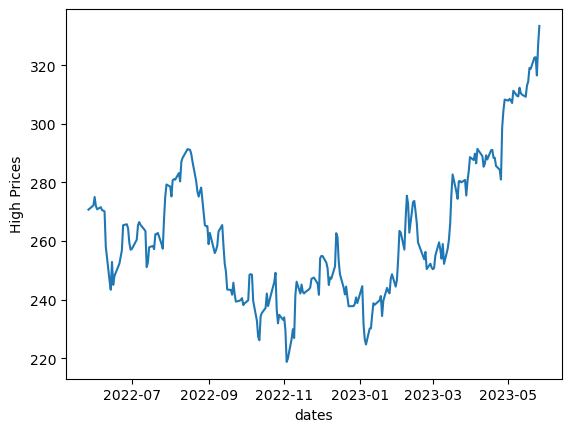

In [6]:
x = info_1y['Date']
y = info_1y['High']
plt.plot(x,y)
plt.xlabel('dates')
plt.ylabel('High Prices')
plt.show()

In [7]:
pip install sqlalchemy-redshift

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install redshift_connector


Note: you may need to restart the kernel to use updated packages.


In [10]:
import redshift_connector

In [11]:
#create connection to redshift
conn = redshift_connector.connect(
    host='coder_house_port',
    database='coder_house_database',
    port=int('coder_house_port'),
    user='coder_house_user',
    password='coder_house_password'
)

In [12]:
cursor = conn.cursor()

In [13]:
#def to execute query into redshift
def redshift_execute(conn,query):
    try:
        cur = conn.cursor()
        cur.execute(query)
        conn.commit()
        cur.close()
    except Exception as err:, 
        print (err)

In [26]:
#Rollback to roll back the prev. query
redshift_execute(conn, "ROLLBACK;")

In [24]:
#query to create table called entregable1 in schema asy_antonioyoo_coderhouse
query = f"""CREATE TABLE asy_antonioyoo_coderhouse.entregable1 (open_rate decimal(10,6), high_rate decimal(10,6), low_rate decimal(10,6), close_rate decimal(10,6), volume integer, dividends decimal(10,6), stock_splits decimal(10,6), date timestamp)"""
redshift_execute(conn,query)